#### Importing libs

In [2]:
from core.neo4jHandler import GraphBuilder
from decouple import config

#### Load Env Vars

In [3]:
URI = config("URI")
USER = config("USER")
PASSWORD = config("PASSWORD")

#### Instanciate object

In [4]:
graph_builder = GraphBuilder(uri=URI, user=USER, password=PASSWORD)

#### View graph

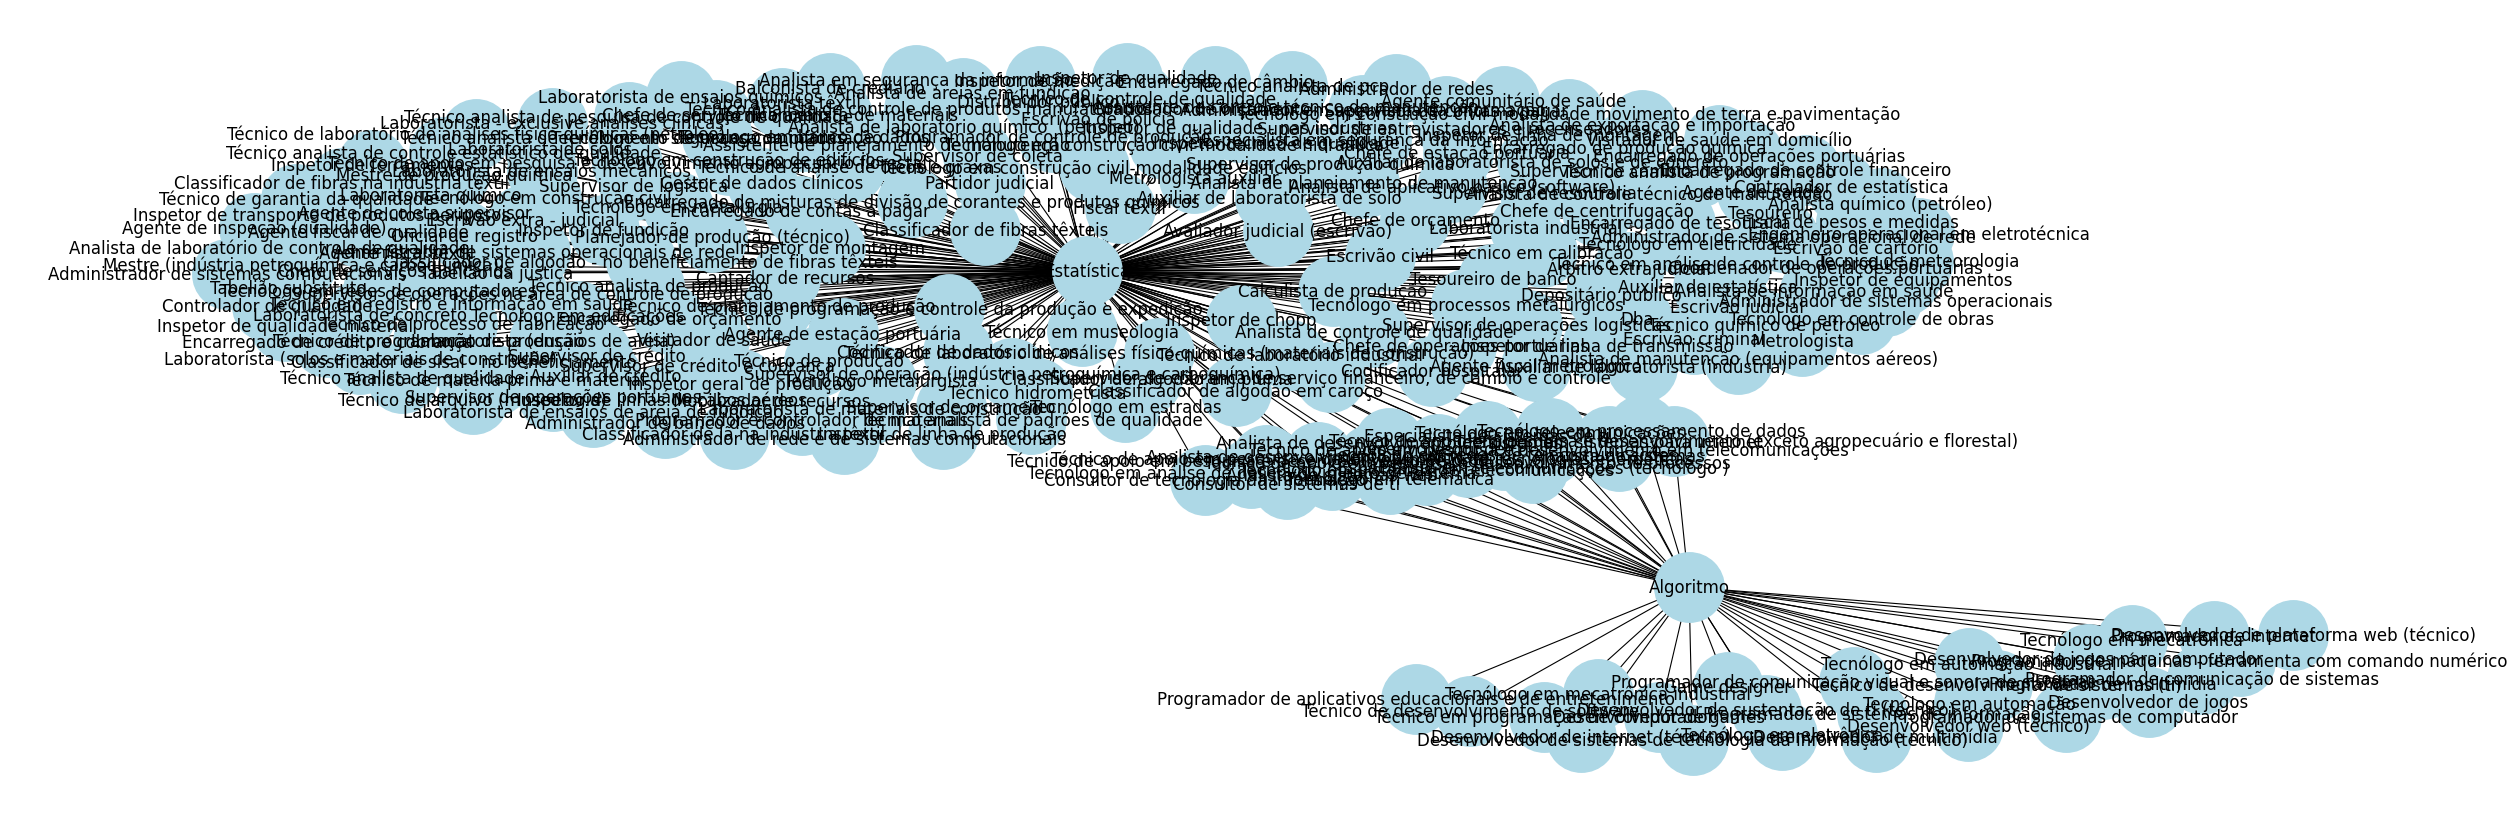

In [8]:
# Define the query to be run on the graph database
query = '''
   MATCH (OCCUPATION)-[r:DEPTH]-(KNOWLEDGE)-[x:FREQUENCY]-(OCCUPATION)-[i:IMPORTANCE]-(KNOWLEDGE)
   WHERE r.level IN [4] AND x.level IN [4,5] AND  i.level IN [4,5] AND KNOWLEDGE.name IN ["Algoritmo", "Estatística"]
   RETURN OCCUPATION, r,  KNOWLEDGE, x
'''
# Use a graph builder to create a visualization of the results of the query
# The builder will limit the number of entities returned to 35 and label nodes with their "name" property
g = graph_builder.build(query=query, property_node="name", limit_entities_return=500)